# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

In [3]:
cities

['chokurdakh',
 'ushuaia',
 'sorvag',
 'barentsburg',
 'taolanaro',
 'puerto ayora',
 'tasiilaq',
 'kavieng',
 'vaini',
 'port augusta',
 'turkmenabat',
 'nizhneyansk',
 'mindif',
 'new norfolk',
 'hasaki',
 'puerto baquerizo moreno',
 'rosarito',
 'bluff',
 'thompson',
 'mehamn',
 'qaanaaq',
 'hamburg',
 'cherskiy',
 'karur',
 'lagoa',
 'vila franca do campo',
 'artyk',
 'pevek',
 'cabo san lucas',
 'rikitea',
 'muli',
 'provideniya',
 'moron',
 'cidreira',
 'atuona',
 'hithadhoo',
 'russell',
 'mahebourg',
 'althofen',
 'lebu',
 'moerai',
 'port elizabeth',
 'deputatskiy',
 'cape town',
 'kodiak',
 'cockburn town',
 'punta arenas',
 'albany',
 'mineiros',
 'mardin',
 'chuy',
 'hobart',
 'nuuk',
 'avarua',
 'saint anthony',
 'mar del plata',
 'butaritari',
 'busselton',
 'chapais',
 'narsaq',
 'hilo',
 'prince rupert',
 'khatanga',
 'kapaa',
 'biak',
 'coromandel',
 'esperance',
 'henties bay',
 'lac du bonnet',
 'trois-rivieres',
 'black diamond',
 'katsuura',
 'salalah',
 'half moon

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    # (First, since the template code gave us strings instead of Geo Coordinates, find latitude and longditude by using Geocoding API.)
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=5&appid={weather_api_key}"

    try:
        geo_coord = requests.get(geo_url).json()

        # Parse out data needed for api request
        url_lat = geo_coord[0]["lat"]
        url_lon = geo_coord[0]["lon"]

        city_url = url + f"{url_lat}&lon={url_lon}&units=imperial&appid={weather_api_key}"
    
        # Log the url, record, and set numbers
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

        # Add 1 to the record count
        record_count += 1

        # Run an API request for each of the cities
        try:
            # Parse the JSON and retrieve data
            city_weather = requests.get(city_url).json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information list into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

        # If an error is experienced, skip the city
        except:
            print("Weather data not found. Skipping...")
            pass
    
    except:
        print("Geo coordinates not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sorvag
Processing Record 4 of Set 1 | barentsburg
Geo coordinates not found. Skipping...
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | turkmenabat
Processing Record 11 of Set 1 | nizhneyansk
Processing Record 12 of Set 1 | mindif
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | rosarito
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | hamburg
Geo coordinates not found. Ski

In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [96]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6194,147.9024,-7.62,97,100,12.19,RU,1668892714
1,ushuaia,-54.8061,-68.3185,47.89,57,40,27.63,AR,1668892715
2,sorvag,68.0369,15.3885,41.90,50,0,6.11,NO,1668892716
3,barentsburg,78.0654,14.2172,38.80,97,98,10.07,SJ,1668892716
4,puerto ayora,-0.7472,-90.3134,81.21,96,95,7.00,EC,1668892717


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [98]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6194,147.9024,-7.62,97,100,12.19,RU,1668892714
1,ushuaia,-54.8061,-68.3185,47.89,57,40,27.63,AR,1668892715
2,sorvag,68.0369,15.3885,41.90,50,0,6.11,NO,1668892716
3,barentsburg,78.0654,14.2172,38.80,97,98,10.07,SJ,1668892716
4,puerto ayora,-0.7472,-90.3134,81.21,96,95,7.00,EC,1668892717


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

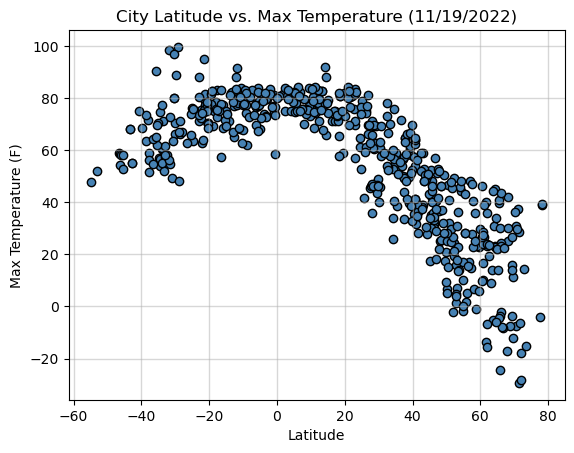

In [99]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (11/19/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

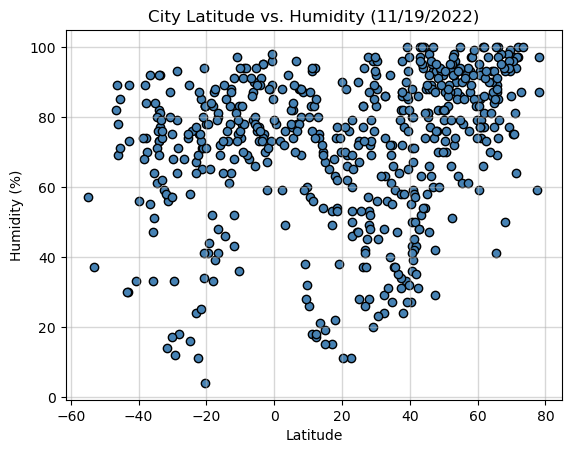

In [101]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11/19/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

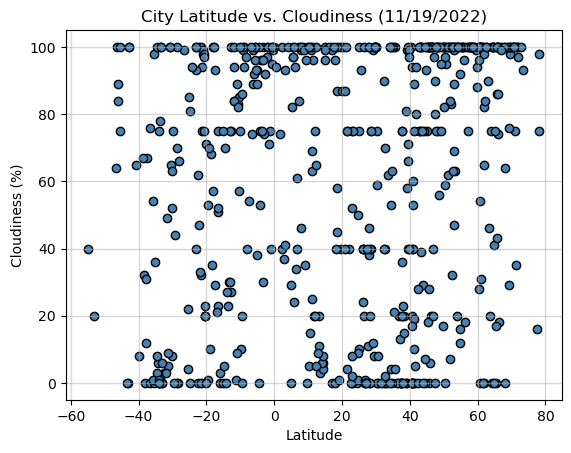

In [102]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11/19/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(-5,105)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

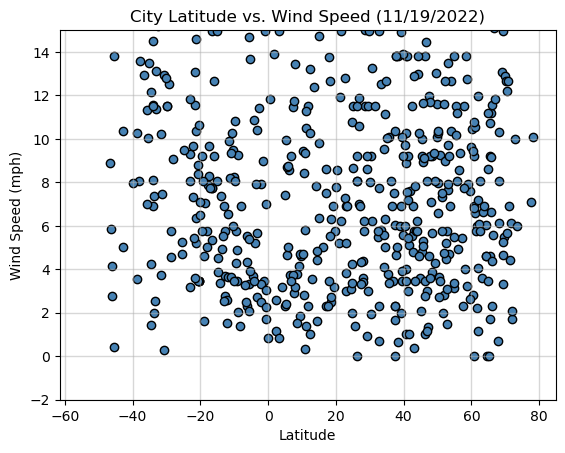

In [103]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11/19/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(-2,15)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
def LinearRegression(x,y):

    #Print the r-value (based on the examples below)
    print(f"The r-value is: : {st.pearsonr(x, y)[0]}")

    #Calculate values and string value (the equation) to return with linregress
    (slopeV, interceptV, rvalueV, pvalueV, stderrV) = linregress(x, y)
    regressV = x * slopeV + interceptV
    equationReturn = "y = " + str(round(slopeV,2)) + "x + " + str(round(interceptV,2))

    # Create the plot
    plt.scatter(x, y)
    plt.plot(x,regressV,"r-")
    return equationReturn

In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6194,147.9024,-7.62,97,100,12.19,RU,1668892714
2,sorvag,68.0369,15.3885,41.90,50,0,6.11,NO,1668892716
3,barentsburg,78.0654,14.2172,38.80,97,98,10.07,SJ,1668892716
5,tasiilaq,65.6153,-37.6378,39.70,69,100,10.71,GL,1668892718
9,turkmenabat,39.0734,63.5832,49.98,100,99,6.91,TM,1668892721


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8061,-68.3185,47.89,57,40,27.63,AR,1668892715
4,puerto ayora,-0.7472,-90.3134,81.21,96,95,7.00,EC,1668892717
6,kavieng,-2.5735,150.7952,82.36,70,92,11.41,PG,1668892719
7,vaini,-21.1926,-175.1773,77.18,71,94,6.38,TO,1668892720
8,port augusta,-32.4909,137.7640,58.05,59,3,15.19,AU,1668892721


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: : -0.8545549666462039


Text(0, 0.5, 'Max Temp')

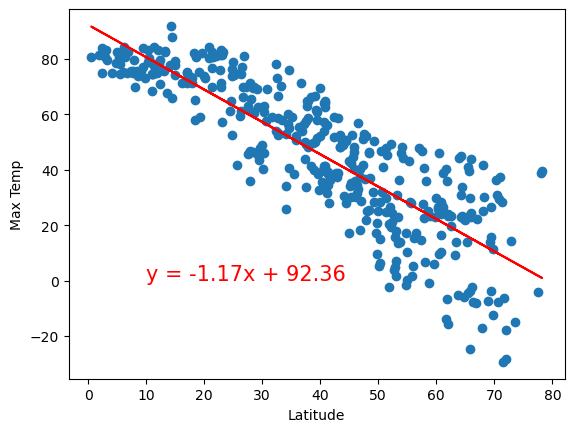

In [108]:
# Linear regression on Northern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressTempLatN = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Format
plt.annotate(linRegressTempLatN,(10,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is: : 0.5485976346880219


Text(0, 0.5, 'Max Temp')

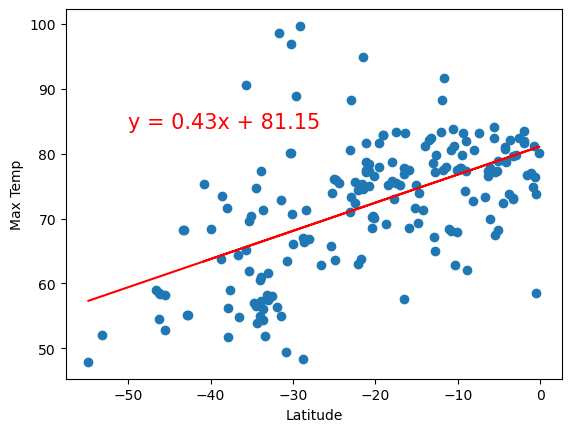

In [111]:
# Linear regression on Southern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressTempLatS = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Format
plt.annotate(linRegressTempLatS,(-50,84),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:**

It's not surprising that both graphs are showing a trend of increasing max temperature the closer we get to the equator.

The Northern Hemisphere (which is currently in Autumn, approaching Winter) has a steeper temperature change per latitude change.
The Southern Hemisphere (which is currently in Spring, approaching Summer) appears to have more outliers, espescially around latitude -30.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: : 0.3759902824624408


Text(0, 0.5, 'Humidity')

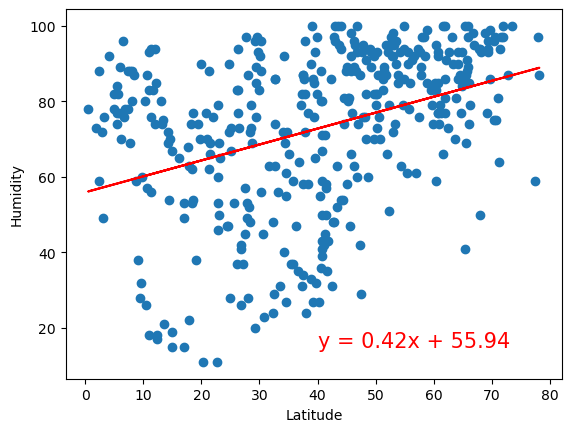

In [112]:
# Northern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressHumLatN = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Format
plt.annotate(linRegressHumLatN,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: : 0.2794873581506264


Text(0, 0.5, 'Humidity')

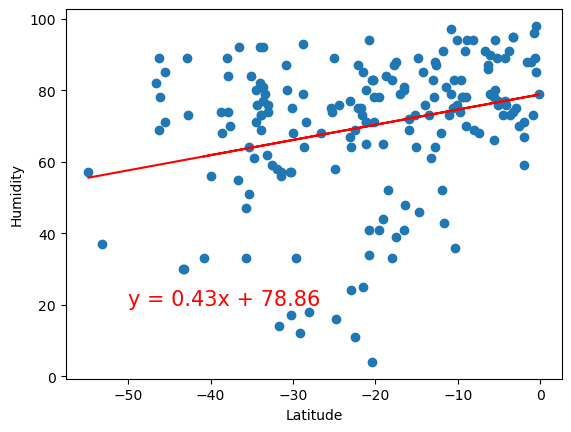

In [113]:
# Southern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressHumLatS = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Format
plt.annotate(linRegressHumLatS,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:**

In both graphs, humidity is increasing with latitude. With that, we'd expect that the more south a city is, the drier the air is in general.

What stands out to me is that although both graphs have a similar slope (.42 and .43), they have very different y-axis intercepts (more than 20 apart).
They also have a relatively low r-value, suggesting to me that the trend might be coincidental.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: : 0.21850408365571572


Text(0, 0.5, 'Cloudiness')

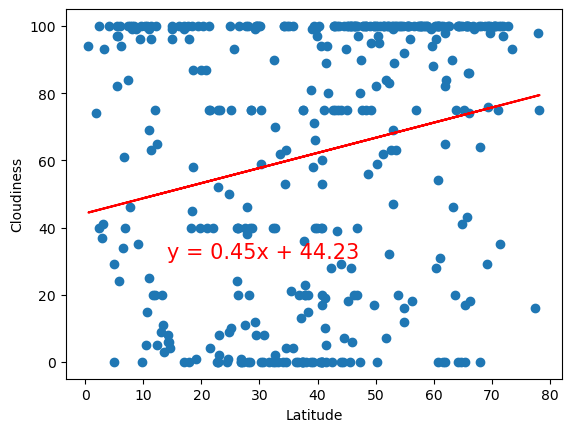

In [118]:
# Northern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressCloudLatN = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Format
plt.annotate(linRegressCloudLatN,(14,31),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is: : 0.3074362807930975


Text(0, 0.5, 'Cloudiness')

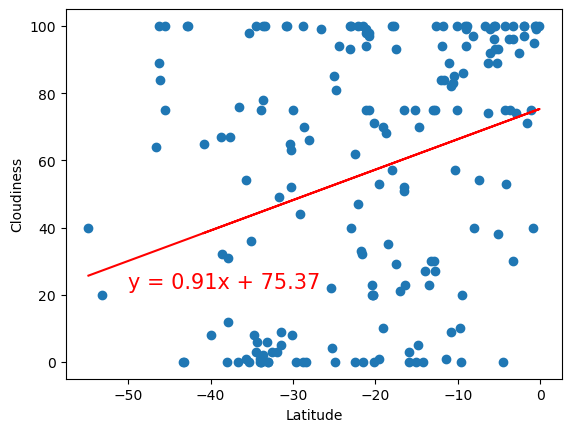

In [120]:
# Southern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressCloudLatS = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Format
plt.annotate(linRegressCloudLatS,(-50,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:**

Though both graphs show a general upwards trend as latitude increases, the actual values seem to not be near the line at all.

Similar to the humidity graphs, I believe that the trend may be coincidental.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: : 0.05358714022199136


Text(0, 0.5, 'Wind Speed')

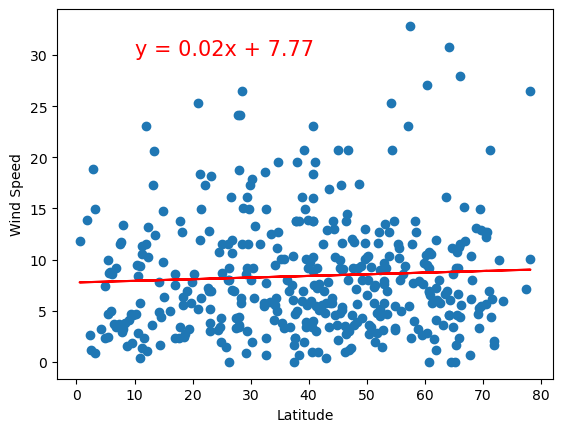

In [122]:
# Northern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressWindLatN = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Format
plt.annotate(linRegressWindLatN,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: : -0.39984471626953255


Text(0, 0.5, 'Wind Speed')

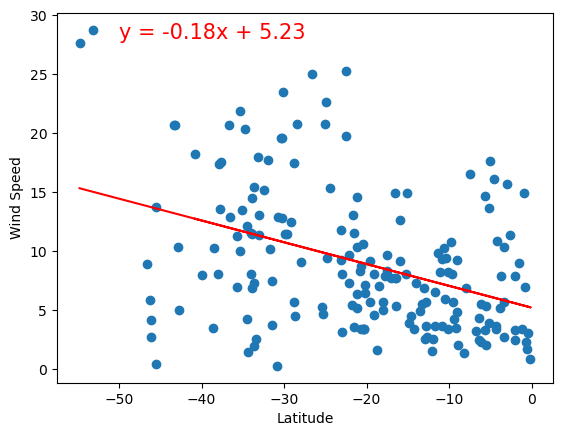

In [124]:
# Southern Hemisphere

# Call function to create plot and return sting to place on the plot
linRegressWindLatS = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Format
plt.annotate(linRegressWindLatS,(-50,28),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:**

In the Northern Hemisphere, latitude does not seem to affect wind speed.
In the Southern Hemisphere though, there is a slight increasing trend of wind speed further south we look.

In both cases, the locations that have the maximum wind speed values are far from the equator (~ +55 and -55)